# CPy 3.01 - Push Button Control of Servo - Solution
___

## Instructions

Control the position of a simple "toy" servo using the built-in CPB buttons. You will need to use the `pulseio`, `adafruit_motor`, and `adafruit_circuitPlayground` module in this script. Each time the script starts (before your main loop), set the angle to the 90 degree position and print the angle to the REPL. Assuming your servo object is named `my_servo`, use `my_servo.angle = 90` to set the angle to 90 degrees. You can read the current angle using `my_servo.angle`.

In you main loop continuously check the values of the two built-in buttons (A and B). If just button A is pressed, decrease the servo angle by 5 degrees. If just button B is pressed increase the servo angle by 5 degrees. If both A and B are pressed simultaneously, reset the angle back to 90 degrees. Our little servo motors have 180 degrees (or less) of total travel, so when A or B are pressed, check the current angle before changing the angle to see if the servo should still be able to move. If the angle is already less than 5 degrees, then set it to 0 if A is pressed. If the angle is already greater than 175, then set it to 180 if B is pressed.

After setting an angle print the angle value to the REPL; i.e. `Servo Angle Set to XX.XXXX`. Also, after setting an angle use the `time.sleep()` function to delay for 0.2 seconds in order to give the user time to take their finger off the button. 

Use the provided diagram to wire the servo to the CPB.

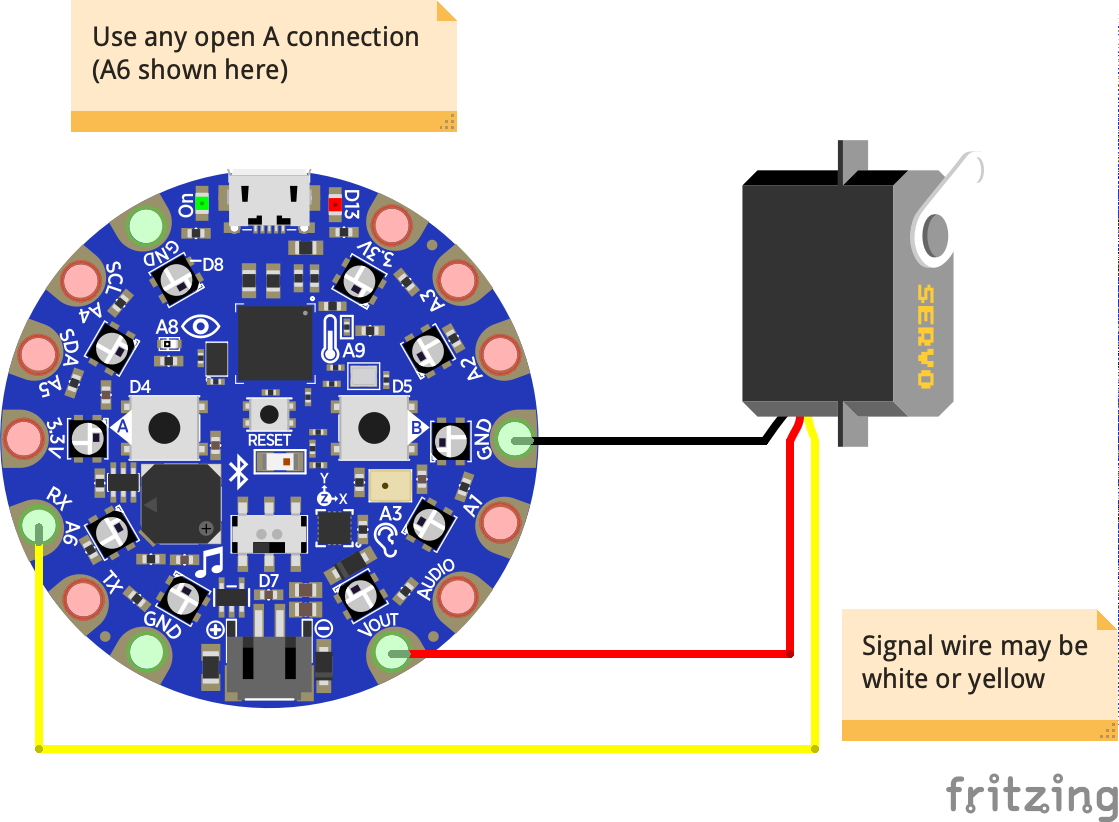

In [ ]:
# Push Button Control of Servo for CPB

import time
import board
import pulseio
from adafruit_motor import servo
from adafruit_circuitplayground import cp

# create a PWMOut object on any of the following D pins
# AUDIO = D12
# A1 = D6
# A2 = D9
# A3 = D10
# A4 = D3
# A5 = D2
# A6 = D0
# TX = D1

pwm = pulseio.PWMOut(board.D9, duty_cycle=65535, frequency=50)

# Create a servo object, my_servo.
my_servo = servo.Servo(pwm)

my_servo.angle = 90
print("Servo at:", my_servo.angle)

while True:
    if cp.button_a and cp.button_b:
        my_servo.angle = 90
        print("Servo at:", my_servo.angle)
        time.sleep(0.2)
    if cp.button_a and not cp.button_b:
        if my_servo.angle > 5:
            my_servo.angle -= 5
        else:
            my_servo.angle = 0
        print("Servo at:", my_servo.angle)
        time.sleep(0.2)
    if cp.button_b and not cp.button_a:
        if my_servo.angle < 175:
            my_servo.angle += 5
        else:
            my_servo.angle = 180
        print("Servo at:", my_servo.angle)
        time.sleep(0.2)

